Import libraries and files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('../System Manager/Python/Placement_Data_Full_Class.csv')

Explanatory Data Analysis (EDA)

In [3]:
dataframe.head()

,serial no,gender,secondary education,board of edu se,highest secondary edu,board of edu hse,specialization in higher secondary edu,degree_p,field of degree,work experience,emplyability test,post graduation,mba_p,placement status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
#Change placement status from yes/no to 1/0

def convert_status(status):
    if status == "Placed":
        return 1
    else:
        return 0

dataframe = pd.read_csv('../System Manager/Python/Placement_Data_Full_Class.csv', 
                        converters={"placement status": convert_status})

dataframe.head()

,serial no,gender,secondary education,board of edu se,highest secondary edu,board of edu hse,specialization in higher secondary edu,degree_p,field of degree,work experience,emplyability test,post graduation,mba_p,placement status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   serial no                               215 non-null    int64  
 1   gender                                  215 non-null    object 
 2   secondary education                     215 non-null    float64
 3   board of edu se                         215 non-null    object 
 4   highest secondary edu                   215 non-null    float64
 5   board of edu hse                        215 non-null    object 
 6   specialization in higher secondary edu  215 non-null    object 
 7   degree_p                                215 non-null    float64
 8   field of degree                         215 non-null    object 
 9   work experience                         215 non-null    object 
 10  emplyability test                       215 non-null    float6

In [6]:
print('Number of rows in training set is:', dataframe.shape[0])
print('Number of columns in training set is:', dataframe.shape[1])

Number of rows in training set is: 215
Number of columns in training set is: 15


In [7]:
print('number of null values in training set:',dataframe.isnull().sum().sum())

number of null values in training set: 67


<Axes: >

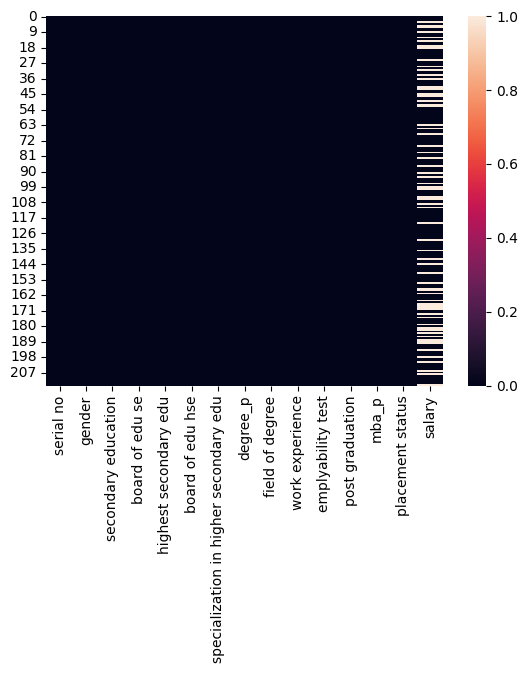

In [8]:
sns.heatmap(dataframe.isnull())

In [9]:
dataframe.drop('serial no',axis=1,inplace=True)
dataframe.isnull().sum()

gender                                     0
secondary education                        0
board of edu se                            0
highest secondary edu                      0
board of edu hse                           0
specialization in higher secondary edu     0
degree_p                                   0
field of degree                            0
work experience                            0
emplyability test                          0
post graduation                            0
mba_p                                      0
placement status                           0
salary                                    67
dtype: int64

In [10]:
new_salary = np.where(dataframe["salary"].isnull(), # Logical check
                       0,                       # Value if check is true
                       dataframe["salary"])     # Value if check is false

dataframe["salary"] = new_salary 

In [11]:
dataframe[dataframe['salary'].isnull()]

,gender,secondary education,board of edu se,highest secondary edu,board of edu hse,specialization in higher secondary edu,degree_p,field of degree,work experience,emplyability test,post graduation,mba_p,placement status,salary


In [12]:

df_num_col = dataframe.select_dtypes(exclude=['object']).columns
df_num = dataframe[df_num_col]
df_num.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
secondary education,215.000000,67.303395,10.827205,40.890000,60.600000,67.000000,75.700000,89.400000
highest secondary edu,215.000000,66.333163,10.897509,37.000000,60.900000,65.000000,73.000000,97.700000
degree_p,215.000000,66.370186,7.358743,50.000000,61.000000,66.000000,72.000000,91.000000
emplyability test,215.000000,72.100558,13.275956,50.000000,60.000000,71.000000,83.500000,98.000000
mba_p,215.000000,62.278186,5.833385,51.210000,57.945000,62.000000,66.255000,77.890000
placement status,215.000000,0.688372,0.464240,0.000000,0.000000,1.000000,1.000000,1.000000
salary,215.000000,198702.325581,154780.926716,0.000000,0.000000,240000.000000,282500.000000,940000.000000


<Axes: >

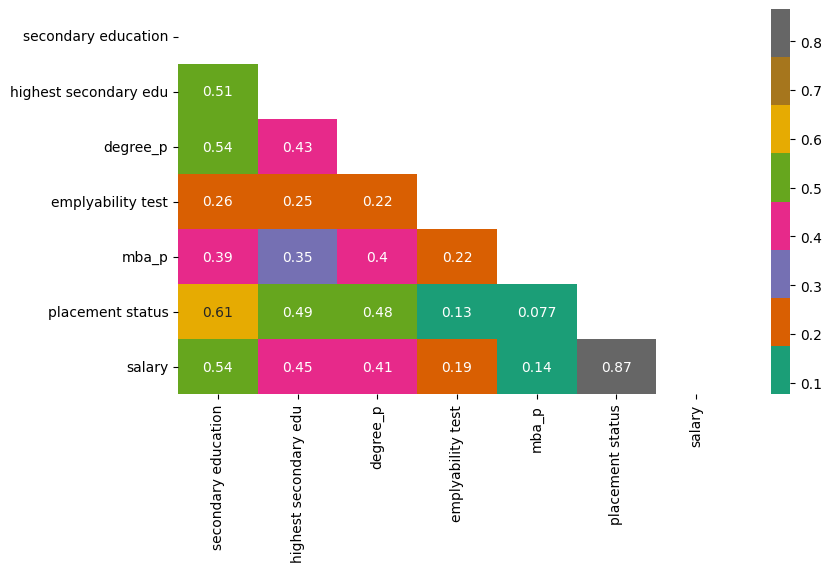

In [13]:
plt.figure(figsize=(9,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='Dark2')

In [14]:
correlation = pd.DataFrame(df_num.corr()['placement status'])
correlation.sort_values(by='placement status', ascending=False).style.background_gradient(cmap='coolwarm_r')

,placement status
placement status,1.000000
salary,0.865774
secondary education,0.607889
highest secondary edu,0.491228
degree_p,0.479861
emplyability test,0.127639
mba_p,0.076922


In [15]:
Res = dataframe['placement status'].value_counts()
Result = pd.DataFrame(Res)
Result['Percentage'] = Result['count']/Result['count'].sum() * 100
Result

,count,Percentage
placement status,,
1,148,68.837209
0,67,31.162791


Text(0.5, 1.0, 'Recruitment result \n (0  || 1)')

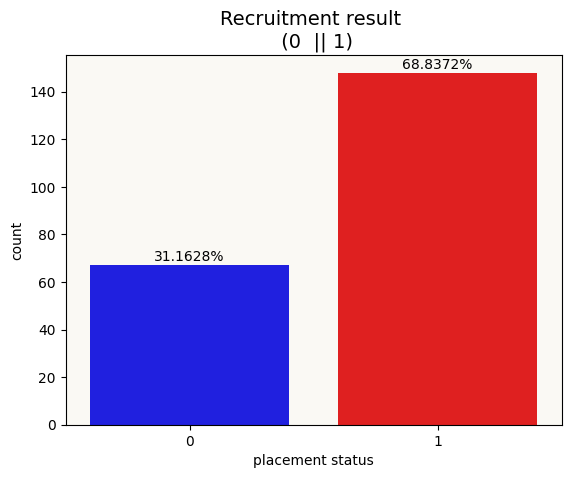

In [16]:
Total = len(dataframe['placement status'])
colors = ['blue','red']

ax = sns.countplot(x = 'placement status', data=dataframe, palette=colors)
ax.set_facecolor('#faf9f4')
for p in ax.patches:
    percentage = f'{100*p.get_height()/Total:.4f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    ax.annotate(percentage, (x, y), ha='center', va='center')
    
plt.title('Recruitment result \n (0  || 1)', fontsize=14)

In [17]:
def feature_plot(feature):
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x =feature, data = dataframe, palette="cool_r")
    for p in ax.patches:
         ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

In [18]:
def feature_plot_with_target(feature):
    plt.figure(figsize=(10,5))
    ax = sns.catplot(x='placement status', col = feature, kind='count', data = dataframe, palette='cool_r')
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

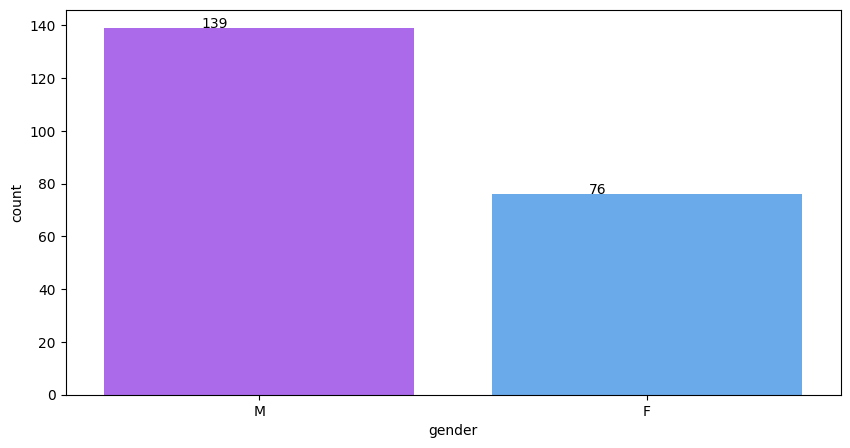

In [19]:
feature_plot('gender')

<Figure size 1000x500 with 0 Axes>

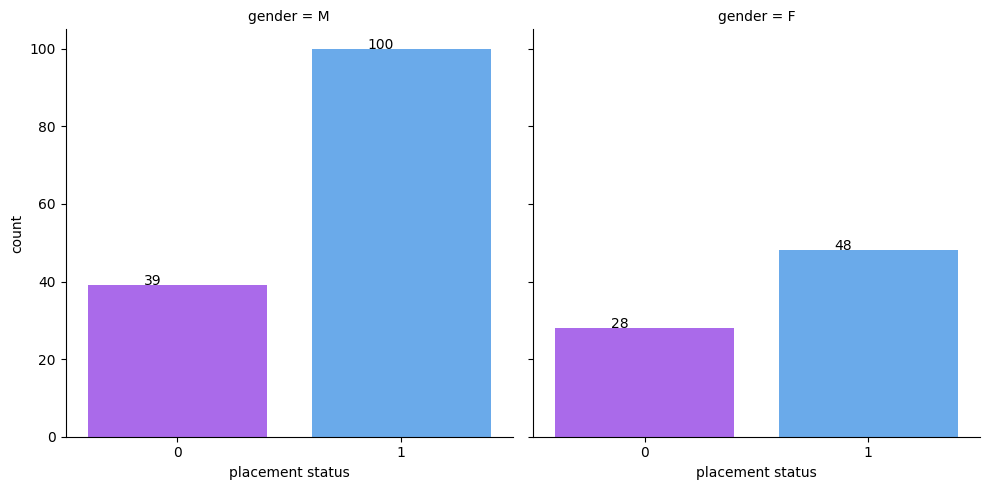

In [20]:
feature_plot_with_target('gender')

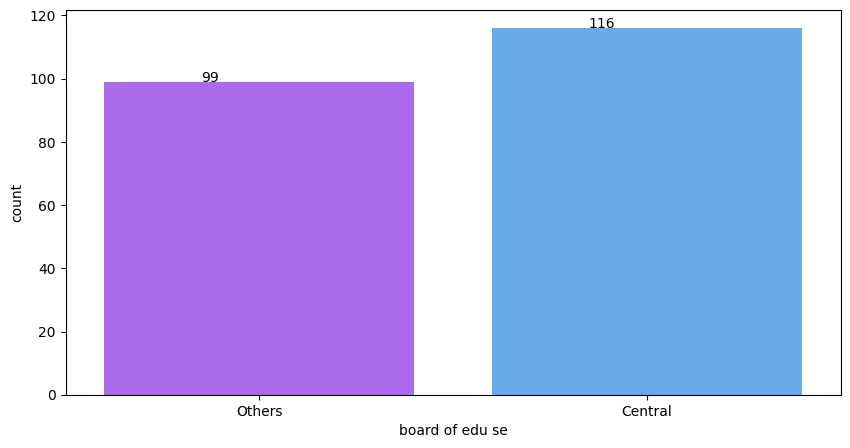

In [21]:
feature_plot('board of edu se')

<Figure size 1000x500 with 0 Axes>

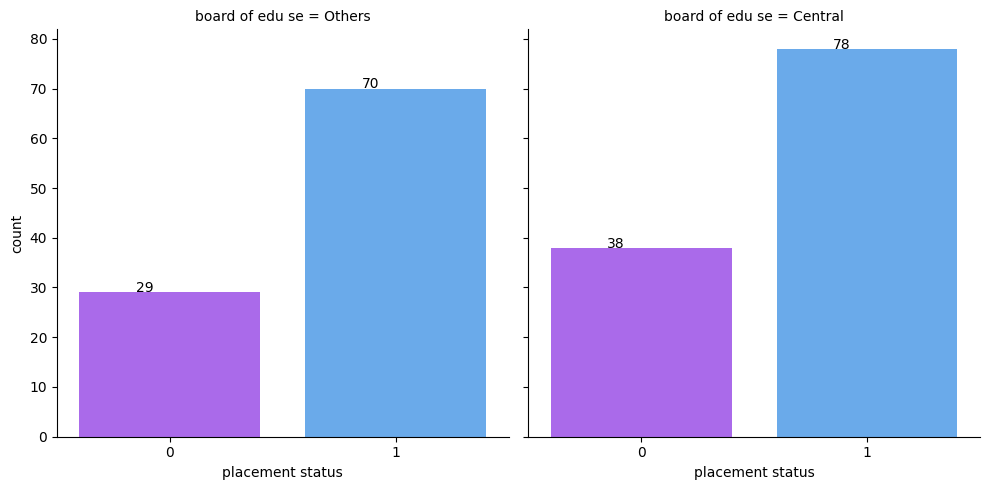

In [22]:
feature_plot_with_target('board of edu se')

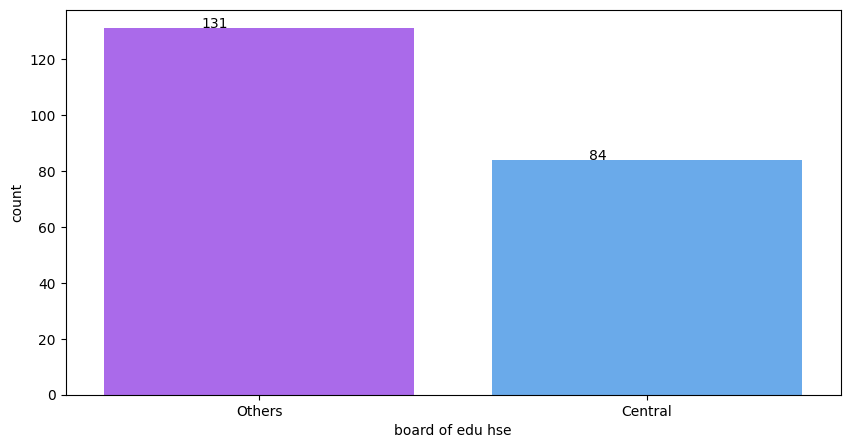

In [23]:
feature_plot('board of edu hse')

<Figure size 1000x500 with 0 Axes>

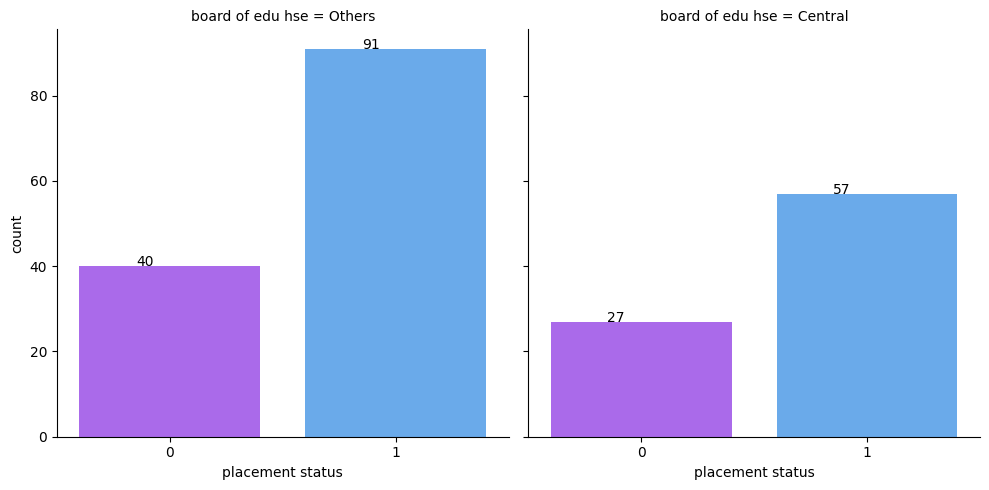

In [24]:
feature_plot_with_target('board of edu hse')

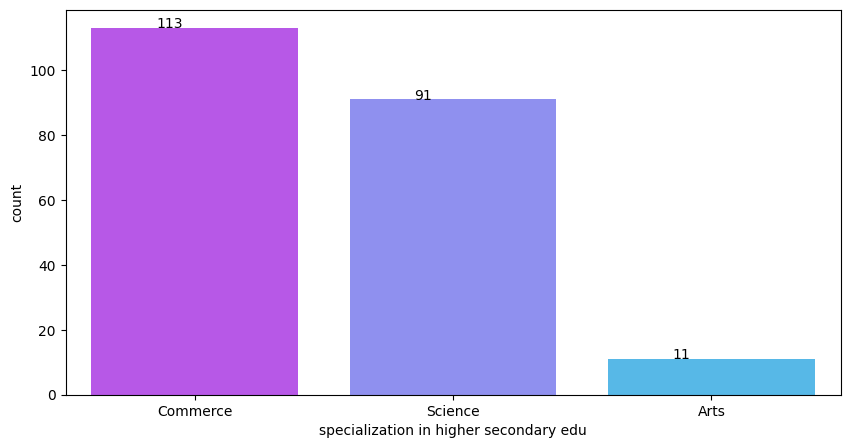

In [25]:
feature_plot('specialization in higher secondary edu')

<Figure size 1000x500 with 0 Axes>

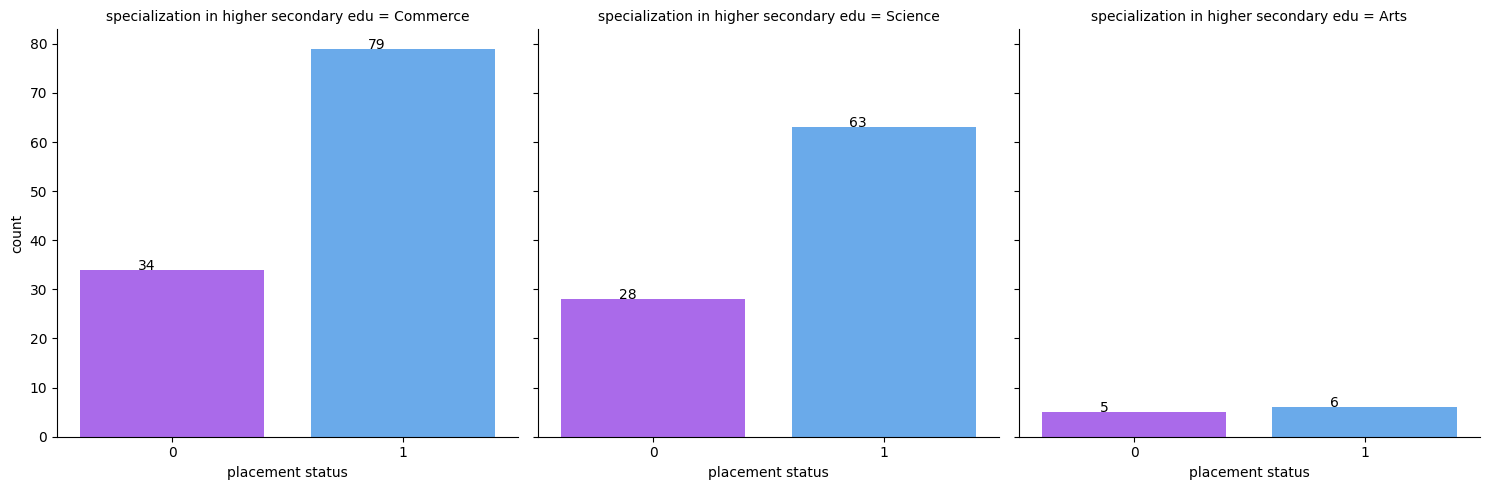

In [26]:
feature_plot_with_target('specialization in higher secondary edu')

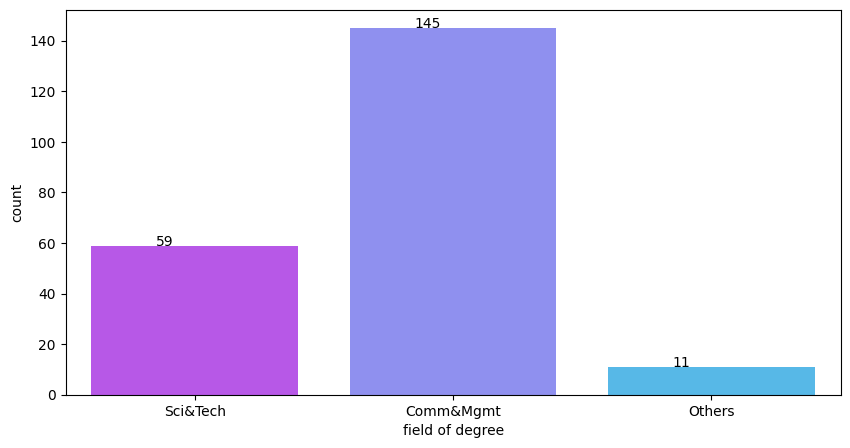

In [27]:
feature_plot('field of degree')

<Figure size 1000x500 with 0 Axes>

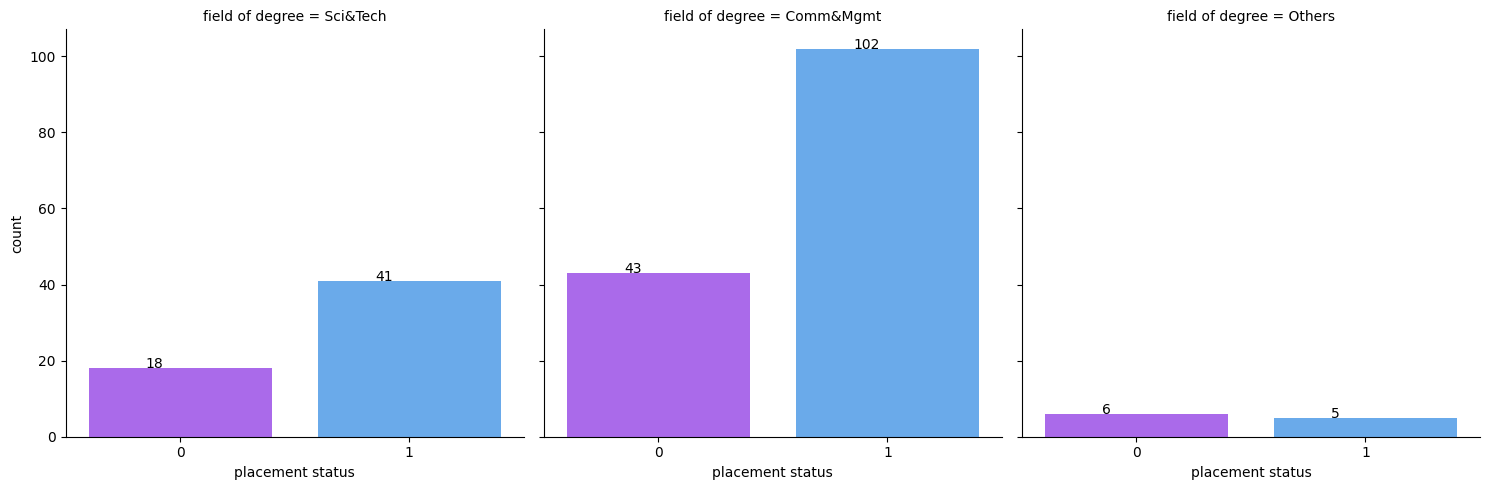

In [28]:
feature_plot_with_target('field of degree')

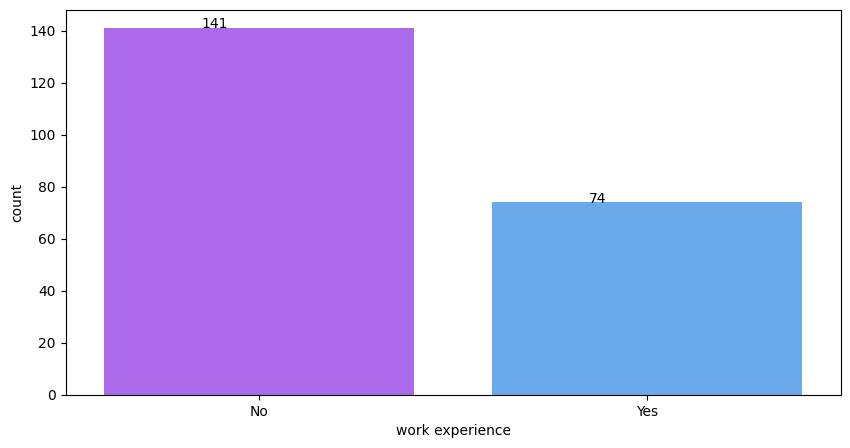

In [29]:
feature_plot('work experience')

<Figure size 1000x500 with 0 Axes>

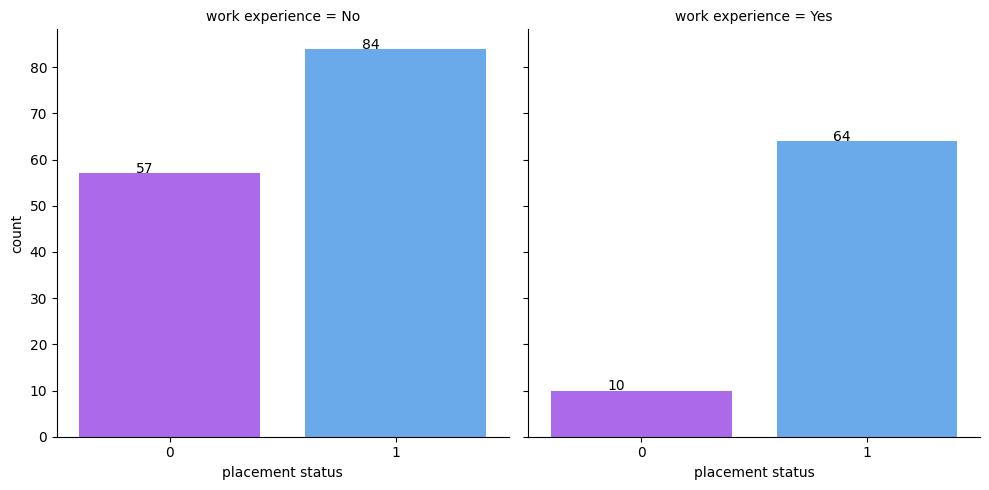

In [30]:
feature_plot_with_target('work experience')

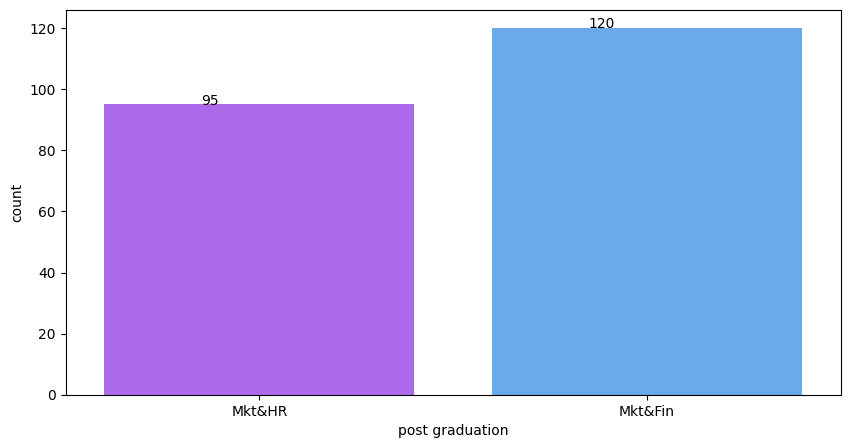

In [31]:
feature_plot('post graduation')

<Figure size 1000x500 with 0 Axes>

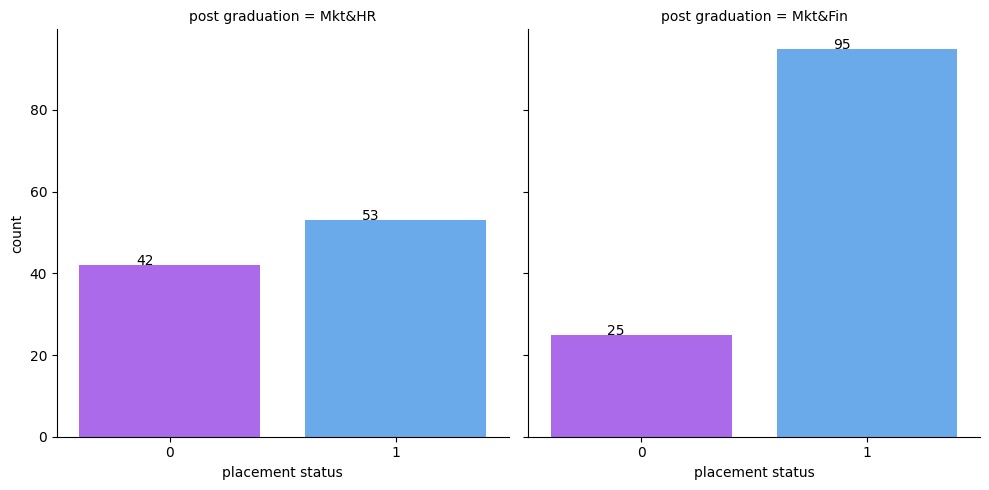

In [32]:
feature_plot_with_target('post graduation')

In [33]:
def hist_feat(feature):
    plt.figure(figsize=(10,5))
    sns.histplot(dataframe[feature].dropna(), kde=True, color='purple',bins=30)

In [34]:
def dis_feat_with_target(feature):
    plt.figure(figsize=(8,5))
    sns.displot(data=dataframe, x=feature, hue='placement status', kind='kde')

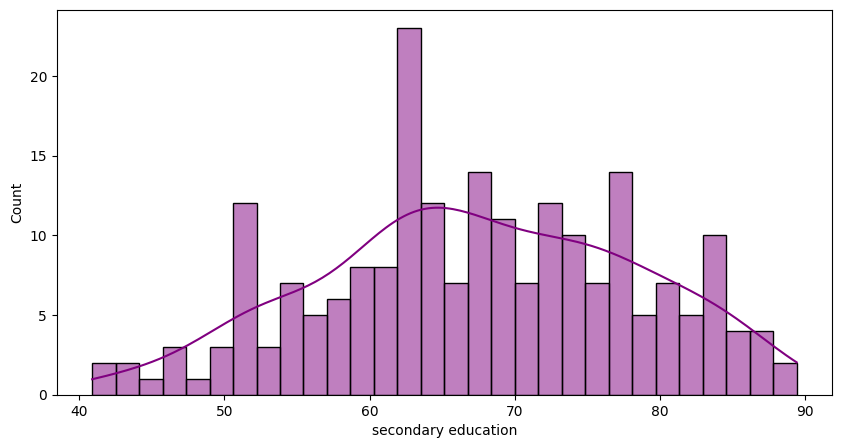

In [35]:
hist_feat('secondary education')

<Figure size 800x500 with 0 Axes>

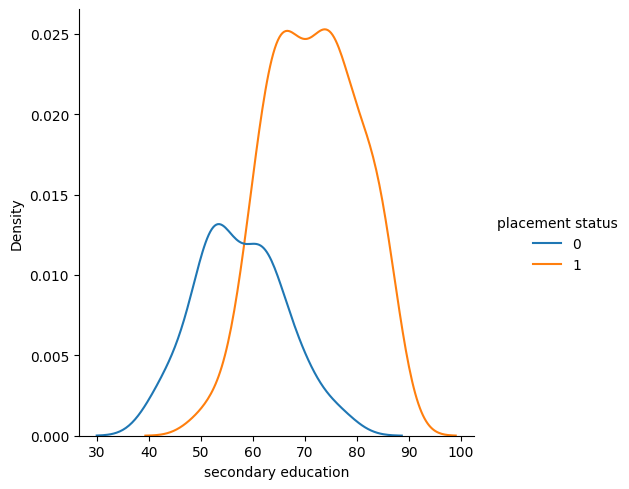

In [36]:
dis_feat_with_target('secondary education')

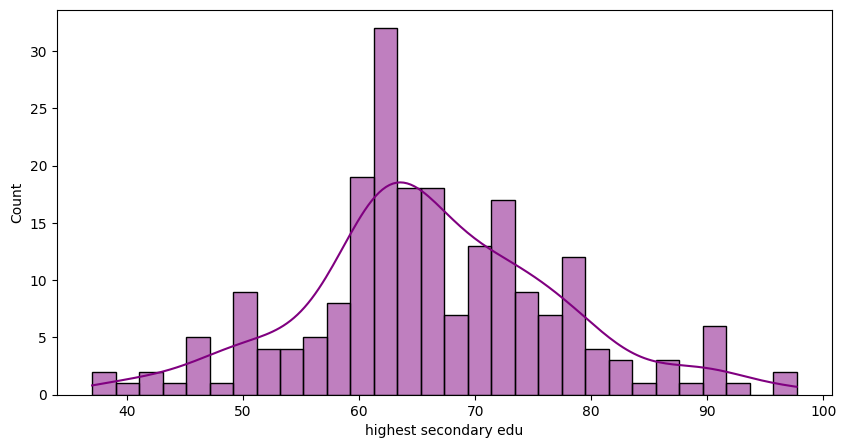

In [37]:
hist_feat('highest secondary edu')

<Figure size 800x500 with 0 Axes>

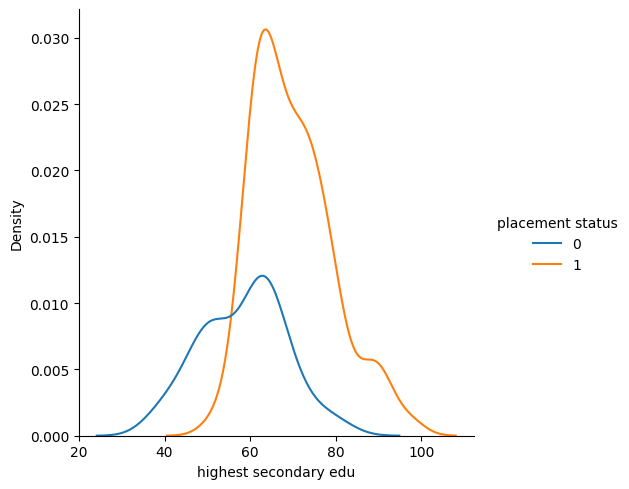

In [38]:
dis_feat_with_target('highest secondary edu')

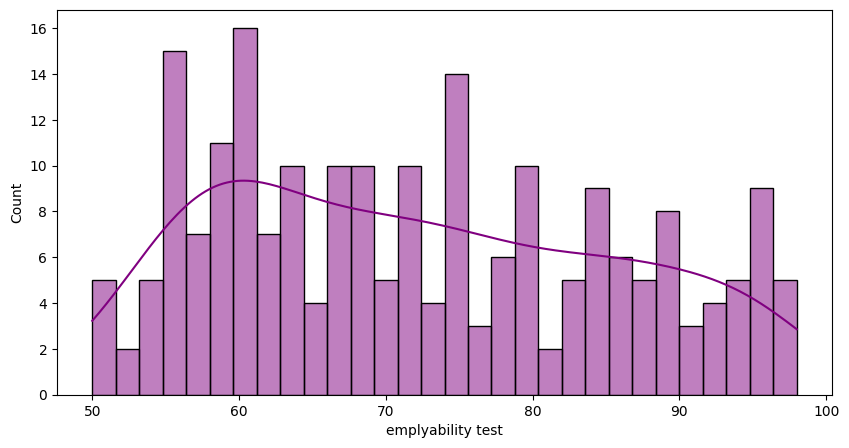

In [39]:
hist_feat('emplyability test')

<Figure size 800x500 with 0 Axes>

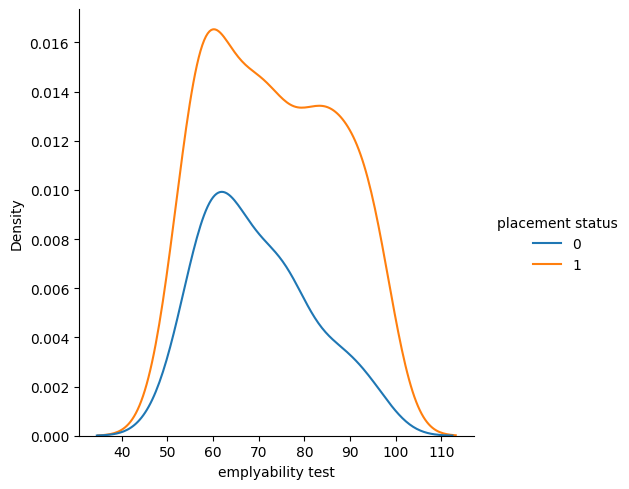

In [40]:
dis_feat_with_target('emplyability test')

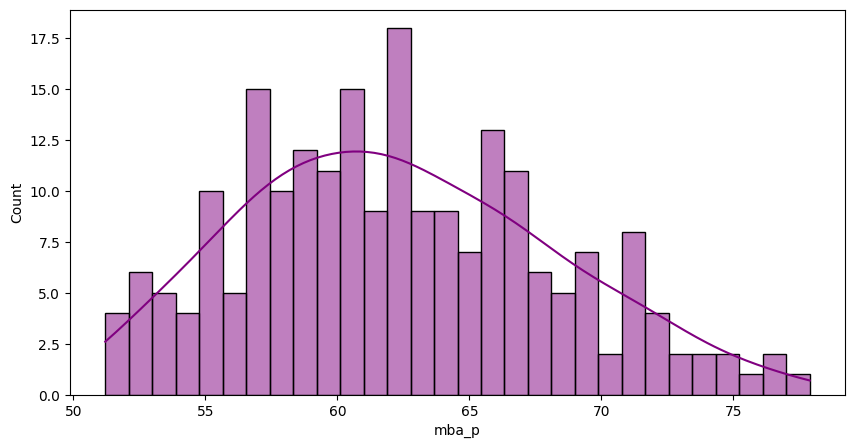

In [41]:
hist_feat('mba_p')

<Figure size 800x500 with 0 Axes>

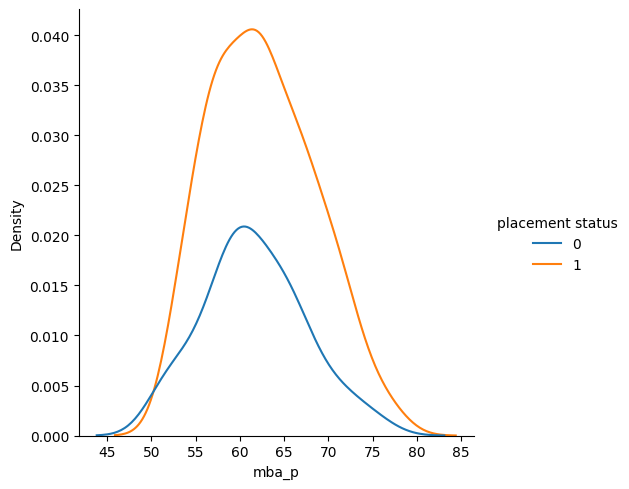

In [42]:
dis_feat_with_target('mba_p')

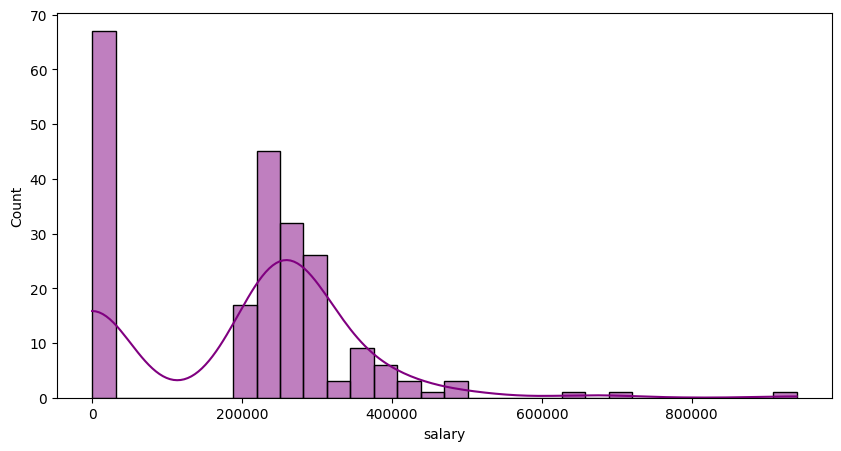

In [43]:
hist_feat('salary')

C:\Users\System Manager\AppData\Local\Temp\ipykernel_6748\3650164931.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=dataframe, x=feature, hue='placement status', kind='kde')


<Figure size 800x500 with 0 Axes>

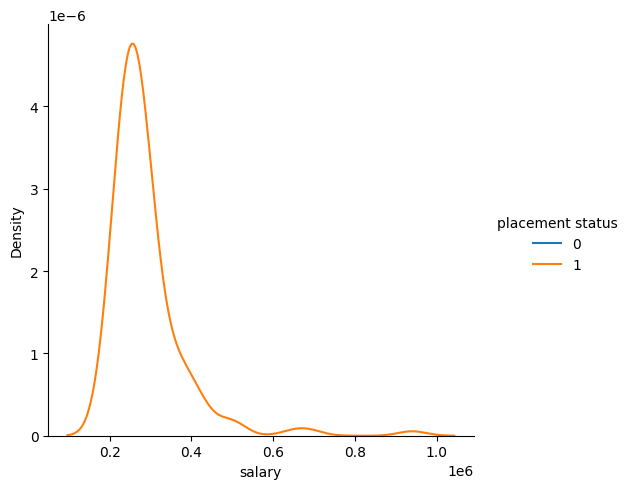

In [44]:
dis_feat_with_target('salary')

Predictive modelling

In [45]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#For Sampling
from sklearn.utils import resample

In [46]:
#Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

#Convert gender encoder to numeric
encoded_gender = label_encoder.fit_transform(dataframe["gender"])

#initialize logistic regression model
log_model = linear_model.LogisticRegression(solver='lbfgs')

#train model
log_model.fit(X= pd.DataFrame(encoded_gender),
              y= dataframe['placement status'])

print('log model intercept:', log_model.intercept_)
print('log model coef:', log_model.coef_)

log model intercept: [0.55989976]
log model coef: [[0.36860891]]


In [47]:
# Make predictions
preds = log_model.predict_proba(X= pd.DataFrame(encoded_gender))
preds = pd.DataFrame(preds)
preds.columns = ["Not placed", "placed"]

# Generate table of predictions vs Sex
pd.crosstab(dataframe["gender"], preds.loc[:, "placed"])

placed,0.636429,0.716773
gender,,
F,76,0
M,0,139


In [48]:
# Convert more variables to numeric

encoded_specialization = label_encoder.fit_transform(dataframe["specialization in higher secondary edu"])

train_features = pd.DataFrame([dataframe['secondary education'],
                              dataframe['degree_p'],
                              encoded_gender,
                              encoded_specialization]).T

# Train the model
log_model.fit(X = train_features ,
              y = dataframe["placement status"])

print('log model intercept:', log_model.intercept_)
print('log model coef:', log_model.coef_)

log model intercept: [-20.69534127]
log model coef: [[ 0.18655415  0.14759153  1.51955249 -0.78561082]]


In [49]:
# Make predictions
preds = log_model.predict(X= train_features)

# Generate table of predictions vs actual
pd.crosstab(preds,dataframe["placement status"])

placement status,0,1
row_0,,
0,48,11
1,19,137


In [50]:
log_model.score(X = train_features ,
                y = dataframe["placement status"])

0.8604651162790697

In [51]:
from sklearn import metrics

# View confusion matrix
metrics.confusion_matrix(y_true=dataframe["placement status"],  # True labels
                         y_pred=preds) # Predicted labels

array([[ 48,  19],
       [ 11, 137]], dtype=int64)

In [52]:
# View summary of common classification metrics
print(metrics.classification_report(y_true=dataframe["placement status"],
                                    y_pred=preds) )

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        67
           1       0.88      0.93      0.90       148

    accuracy                           0.86       215
   macro avg       0.85      0.82      0.83       215
weighted avg       0.86      0.86      0.86       215

